## Problem Statement -  To Identify a fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

##### The Dataset contains only numerical input variables which are the result of a PCA transformation. 
##### Due to confidentiality issues,the original features and more background information about the data cannot be provided. Features V1, V2, … V28 are the principal components obtained with PC. The only features which have not been transformed with PCA are 'Time' and 'Amount'. 
##### Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount.
#### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [1]:
#### Import Requisite Libraries 

In [2]:
import seaborn as sns
import os
os.chdir("C:\\Users\\92sup\\Downloads\\ML")
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#### Loading the DataSet

In [3]:
# Loading the data set
credit_card_data=pd.read_csv("C:\\Users\\92sup\\Downloads\\ML\\creditcard.csv")

#### Display the data

In [4]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Dataset informations  - To check for the null values in the dataset

In [5]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### There are no null values in the dataset. So we are good to proceed further.

### # Check the distribution of legit transactions & fraudulent transactions

In [7]:
credit_card_data['Class'].value_counts()     

0    284315
1       492
Name: Class, dtype: int64

### From Above We can see that the dataset is highly unbalanced
####  0 - Normal Transactions and 1 - Fraudulent Transaction

In [8]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

(284315, 31)
(492, 31)


<AxesSubplot:xlabel='Class', ylabel='count'>

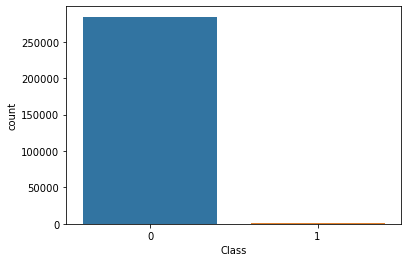

In [9]:
print(legit.shape)
print(fraud.shape)
sns.countplot(data=credit_card_data, x = 'Class')

In [10]:
# statistical measures of the column Amount for legit transactions of the dataset
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
# statistical measures of the column Amount of fraudulant transaction of the dataset
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


#### Since the dataset is highly imbalance so  we have to treat the dataset. One of the method to deal with the imbalance dataset is -#### Under-Sampling  - Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions
#### Here the Number of Fraudulent Transactions --> 492

In [13]:
legit_sample = legit.sample(n=492)

### Concatenating two DataFrames

In [14]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [15]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
60356,49288.0,1.003483,-0.408614,0.401355,1.230149,-0.213325,0.821550,-0.320071,0.213465,0.962364,...,-0.024452,0.038027,-0.293430,-0.896628,0.693383,-0.194711,0.053401,0.030694,108.10,0
234249,147895.0,2.030346,-1.976211,-0.911223,-1.553611,-1.591864,-0.320903,-1.304372,0.018830,-1.019231,...,-0.068461,-0.054669,0.101150,-0.552218,-0.352105,-0.173596,-0.011831,-0.041667,138.00,0
277988,167973.0,-3.990448,1.557792,-2.203422,-1.017733,-1.254282,1.480877,-2.377234,3.375287,-0.579477,...,0.284523,-0.194881,0.276121,-0.944618,-0.306216,-0.254428,-1.482061,-0.751649,10.40,0
236217,148714.0,-0.822009,0.727484,-0.831615,0.985242,2.279503,-0.576932,0.937583,-0.117804,-0.249745,...,-0.080586,0.236954,-0.406225,0.141539,0.020342,-0.412641,0.457211,0.099478,21.00,0
36753,38672.0,1.262084,0.570745,-0.096713,1.100253,0.148624,-1.156726,0.653090,-0.432861,-0.480131,...,0.022951,0.169828,-0.169180,0.437680,0.895093,-0.301455,-0.000858,0.015216,9.99,0


In [16]:
new_dataset['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

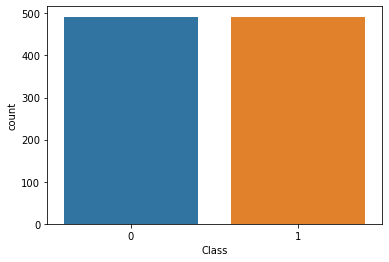

In [17]:
# Plot the graph after making the dataset balance
sns.countplot(data=new_dataset, x = 'Class')

### Splitting the data into Features & Targets

In [18]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [19]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
60356    49288.0  1.003483 -0.408614  0.401355  1.230149 -0.213325  0.821550   
234249  147895.0  2.030346 -1.976211 -0.911223 -1.553611 -1.591864 -0.320903   
277988  167973.0 -3.990448  1.557792 -2.203422 -1.017733 -1.254282  1.480877   
236217  148714.0 -0.822009  0.727484 -0.831615  0.985242  2.279503 -0.576932   
36753    38672.0  1.262084  0.570745 -0.096713  1.100253  0.148624 -1.156726   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [20]:
print(Y)

60356     0
234249    0
277988    0
236217    0
36753     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


### Split the data into Training data & Testing Data

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


### MODEL TRAINING

#### Here we will use the Logistic regression model to classify the fraudulent and the legit transactions

In [23]:
model = LogisticRegression()

In [24]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

In [25]:
# Predit using the same model
X_train_prediction = model.predict(X_train)

### Model Evaluation

### ACCURACY SCORE

In [26]:
# Accuracy Score on the training data
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9377382465057179


In [27]:
# Accuracy on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = (accuracy_score(X_test_prediction, Y_test))*100
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  93.4010152284264


In [28]:
## So we can say that the our logistic regression model gives an accuracy of 92%  in classifying the transaction into legit or fraudulent.

## Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
# random forest with 500 trees
# fit the model
rt_classify = RandomForestClassifier(n_estimators = 500, random_state = 0)
rt_classify.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=500, random_state=0)

In [30]:
# Make predictions
rt_y_predict = rt_classify.predict(X_test)

In [31]:
## Accuracy
random_forest_accuracy= (rt_classify.score(X_test, Y_test))*100
print('The accuracy of the model is',random_forest_accuracy)

The accuracy of the model is 93.90862944162437


## Decision Tree

In [32]:
#for fitting classification tree
from sklearn.tree import DecisionTreeClassifier
#to create confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn import tree

In [33]:
#defining the Decision tree function
model = DecisionTreeClassifier(max_depth= 8, min_samples_leaf=5)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

In [34]:
#ACCURACY
model_accuracy= (model.score(X_test, Y_test))*100
print('The accuracy of the model is',model_accuracy)

The accuracy of the model is 89.84771573604061


## COMPARING THE RESULTS 

The accuracy of logistic regression model 93.4010152284264
The accuracy of Random Forest model 93.90862944162437
The accuracy of decision tree model 89.84771573604061


C:\Users\92sup\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Accuracy')

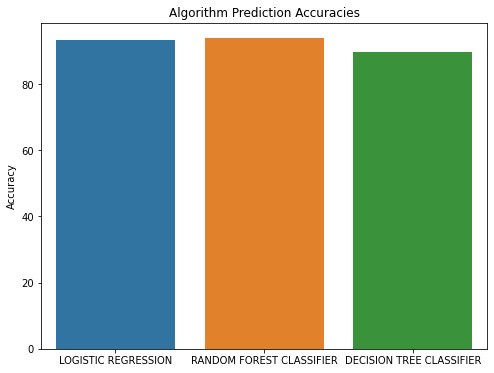

In [35]:
import matplotlib.pyplot as plt
Methods = ['LOGISTIC REGRESSION', 'RANDOM FOREST CLASSIFIER','DECISION TREE CLASSIFIER']
Scores = np.array([test_data_accuracy,random_forest_accuracy,model_accuracy])
print('The accuracy of logistic regression model',test_data_accuracy)
print('The accuracy of Random Forest model',random_forest_accuracy)
print('The accuracy of decision tree model',model_accuracy)
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(Methods, Scores)
plt.title('Algorithm Prediction Accuracies')
plt.ylabel('Accuracy')